## Loading the dataset and basic exploration

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [2]:
df= pd.read_csv("sunspots.csv")
df.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [3]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [4]:
df.shape

(309, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    int64  
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.0 KB


## Preparation of data

In [8]:
#we will convert the year column into a date-time object
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del df["YEAR"]
df.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


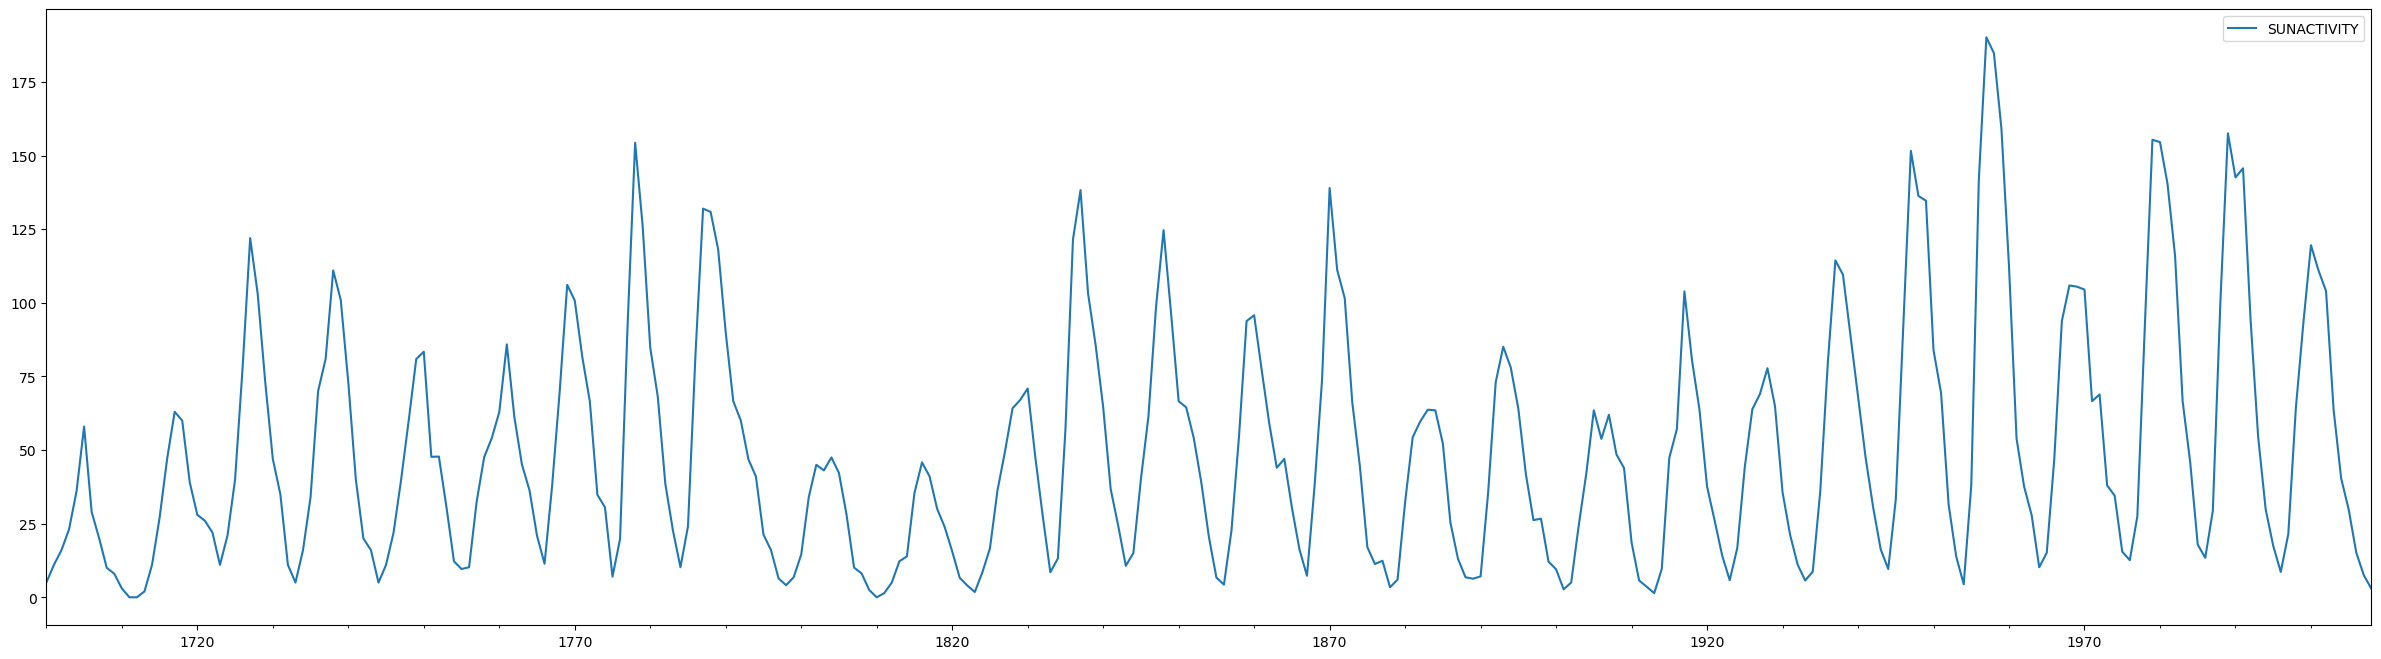

In [13]:
#plotting the data o have a basic look at the distribution
# show plots in the notebook
%matplotlib inline
df.plot(figsize=(30,8));

In [14]:
# Durbin-Watson statistic value lies in the 0-4 range, with a value near two indicating no first-order serial correlation. 
#Positive serial correlation is associated with DW values below 2 and negative serial correlation with DW values above 2.
sm.stats.durbin_watson(df)


array([0.13952893])

The value of **Durbin-Watson** statistic in our example is 0.1395. That means that there is a strong evidence that the variable open has high autocorrelation.

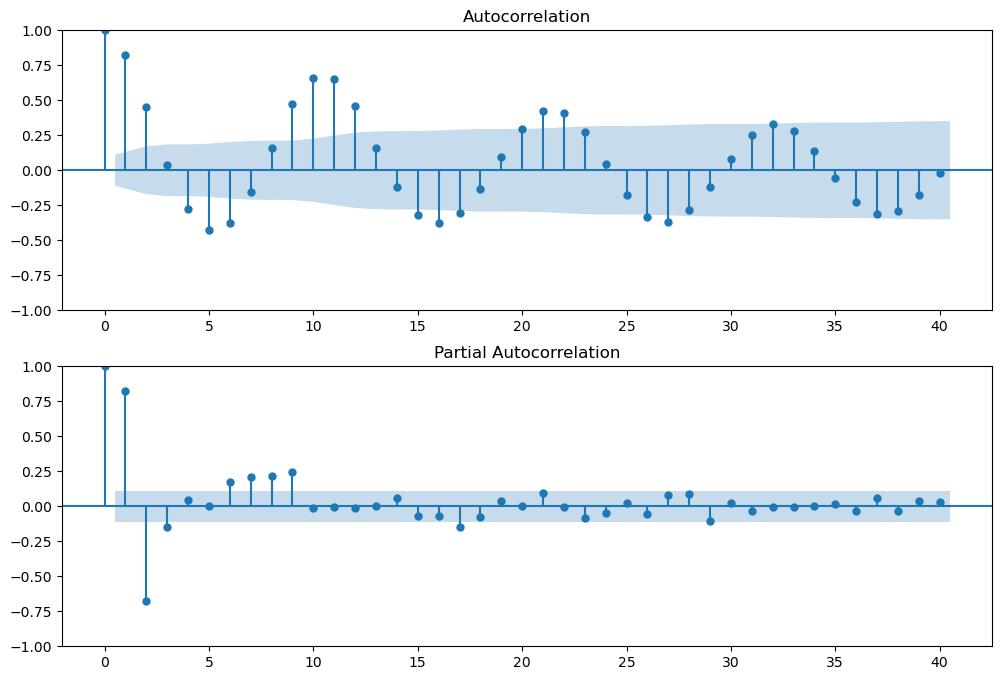

In [16]:
# plotting the ACF and PACF
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)